# <center>Livrable Modélisation</center>
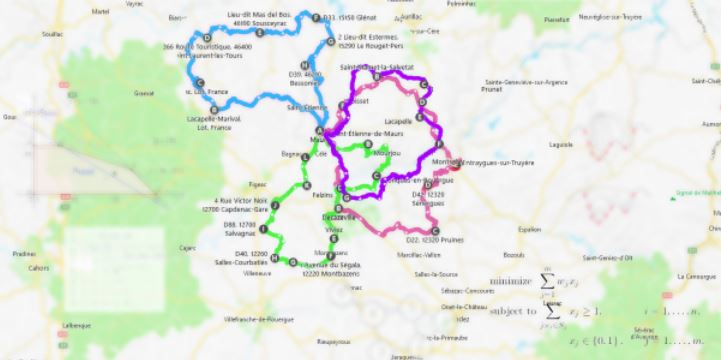


## Introduction
<br>
<div style="text-align: justify"> Après un récent appel lancé par l’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) afin d’encourager la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires. De plus, l’écologie est un défi primordial,en effet l’impact des véhicules sur l’environnement est important.  </div>

Notre équipe a été mise en place par CesiCDP afin de répondre à l’appel de l’ADEME.  

Pour le CesiCDP, l’enjeux est de décrocher de nouveaux marchés avec des financements très avantageux pour continuer à développer son activité. 

<div style="text-align: justify">Le CesiCDP a décidé de focaliser son étude sur la gestion des tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier un itinéraire permettant de relier un sous-ensemble de villes, puis de revenir à son point de départ, afin de minimiser la durée totale du parcours. Cette optimisation devra prendre en compte le trafic attendu sur chaque axe pour les différents créneaux horaires. </div>

Le but est de proposer une méthode issue de la recherche opérationnelle pour générer une tournée de livraison correspondant à ce problème. 

Le périmètre reste à définir. Nous devons d’abord décrire une version de base du problème. Puis, pour rendre la situation plus réaliste et d'obtenir toute l'attention de l'ADEME, nous devrons y ajouter des contraintes supplémentaires. 



## Modélisation du problème

Afin de modéliser au mieux la situation de notre problème, nous avons décider d'utiliser d'utiliser les graphes. Nous représenterons notre carte routière à l'aide de points indiquant les villes et de lignes entre ces points représentant les routes entre ces villes. Afin de rendre les choses plus réaliste, chaque point ne sera relié qu'à un certain nombre d'autres points (graphe non complet). De cette manière, notre camion ne pourra voyager que de villes voisines en villes voisines en empreintant les chemins éxistants.

Les points de ce graphe seront généré à des coordonées aléatoires parmis une plage de valeur comprenant un point de départ (depot représenté en rouge) toujours situé au milieu du graphe, et des points de livraisons (représentés en vert). Une matrice d'adjacence elle aussi généré aléatoirement tout en respectant un nombre maximum de voisins ainsi que la connexité du graphe, permettra de déterminer les villes reliées entre elles.

**Exemple de graphe généré (10 points dont 4 colis et 3 voisins maximum par points) :**
![Exemple de graphe](img/exemple_graphe.PNG)

## Différents algorithmes

En analysant le contexte de ce projet, on se rend vite compte qu'il est similaire au problème du voyageur de commerce. Nous devons passer par nos points le plus rapidement possible tout en pouvant passer pluseirus fois par le même point, en prenant donc sur un graphe les arrêtes dont le poids est le plus faible.

La complexité de la résolution de ce problème est de type NP-Complet : 

Définition 12.8 : 

https://www.enseignement.polytechnique.fr/informatique/INF423/uploads/Main/chap12-good.pdf 

En cherchant comment résoudre le problème, nous avons affiné nos recherches de l’algorithme idéal en analysant trois solutions possibles : 

- Algorithmes d’arbre couvrant de poids minimal 

- Algorithme de Christofides (Algorithme d’approximation)  

- Algorithmes VRP (Vehicule Routing Problem) 

<u>Arbre couvrant de poids minimal</u>:  

<div style="text-align: justify">Le modèle en arbre couvrant de poids minimal est le modèle le plus basique lorsqu’il s’agit de trouver le chemin le plus court. Il a pour but de connecter tous les points d’un graphe tout en ayant la somme des arêtes la plus faible possible. Il existe de nombreux algorithmes différents pour trouver le meilleur chemin, tel que celui de Prim, Kruskal ou Borůvka. Tous ces algorithmes sont des algorithmes gloutons, c’est à dire qu’ils recherchent étapes part étapes des optimum locaux afin de trouver un optimum global. </div>

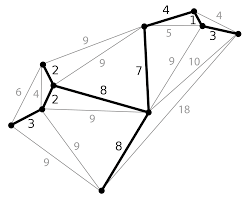



<u>Algorithme de Christofides</u>: 

<div style="text-align: justify"> Cet algorithme est également un algorithme d’arbre couvrant de poids minimal mais est spécifique au problème du voyageur de commerce, donc très pertinent dans notre situation, à noter que cet algorithme est heuristique, c’est à dire qu’il permet de résoudre des problèmes complexe d’optimisation rapidement. Nous le détaillerons plus en détail dans la suite de ce document. </div>

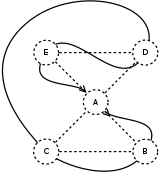

<u>Algorithme VRP</u> : 

<div style="text-align: justify">Les algorithmes de VRP sont des algorithmes dédiés aux problèmes de tournée de véhicules. C’est un problème de recherche opérationnelle et d’optimisation combinatoire, c’est à dire que l’on cherche le meilleur résultat le plus optimisé. Ce problème est une extension du problème du voyageur de commerce qui consiste à trouver la tournée de livraison la plus rapide pour une flotte de véhicule. </div>

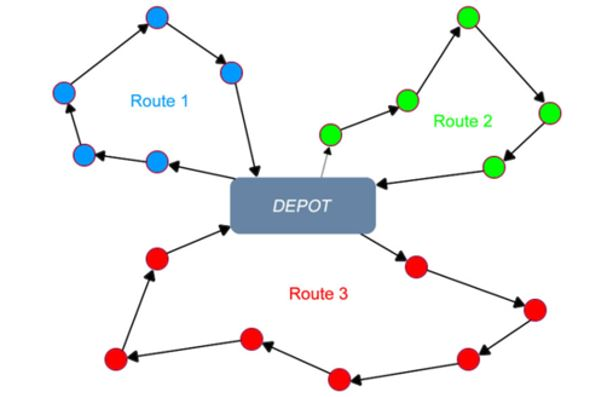

## Pseudo-code

Pour définir notre solution, nous devons tout d'abord déterminer les différentes étapes.

<div style="text-align: justify">1. Choix de la ville/zone <strong> Complexité : O(1)</strong>

2. Choix des placements (random) des points de livraisons sur les intersections (nombre de points de livraisons : pourcentage du nombre total de points comme 5 ou 10%)  <strong>Complexité : O(n) </strong>

//Algorithme de Christofides modifié 
Démonstration mathématique : https://apps.dtic.mil/dtic/tr/fulltext/u2/a025602.pdf

3. On définit un arbre de poids couvrant minimal mais seulement pour des points fixés sur une livraison, on ne va pas chercher a couvrir tous les points de la ville. <strong>Complexité : O(n) </strong>

4. Sur une copie du graphe de la ville, on va supprimer les sommets et les arrêtes qui y sont liés non compris dans l’arbre (ou ne garder que celles qui y sont) <strong>Complexité : O(n) </strong>

5. Sur cet arbre, on fait un graph « à part » ou on ne garde que les sommets de degrés impairs <strong>Complexité : O(n) </strong>

6. On ne garde que les arrêtes de poids minimal pour relier pair à pair ces sommets de degré impairs qu’on a gardé et on les ajoute à notre arbre couvrant de poids minimal, on note les autres comme à "supprimer". <strong>Complexité : O(n) </strong>

7. On calcule le tour du tour eulérien de l’arbre maintenant que notre arbre est un cycle eulérien (étape précédente) <strong>Complexité : O(n) </strong>

8. Sur le tour qu’on vient d’effectuer, on note comme à "supprimer" les arrêtes qui nous ont fait passer deux fois sur le même point  <strong>Complexité : O(n) : Sur le tour qu’on vient d’effectuer, on note comme à supprimer » les arrêtes qui nous ont fait passer deux fois sur le même point</strong>

9. Sur notre copie réalisée dans l’étape 4 avec les points nécessaires, on supprime toutes les arêtes qu’on a noté comme « à supprimer » dans les étapes 6 et 8. <strong>Complexité : O(n) </strong>
</div>

## Représentation exemple des étapes de l'algorithme précédemment exposé :

1. Génération du graphe avec le point de départ en vert

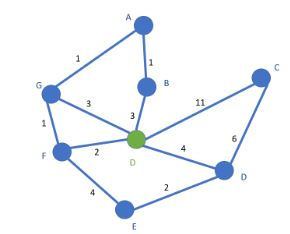

2. Choix aléatoire des points de livraisons

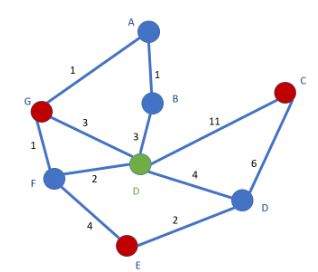

3. Arbre de poids couvrant minimal focus sur nos points

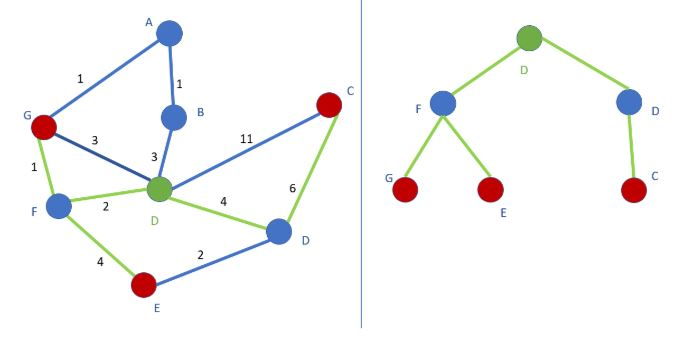

4. Suppression des points non présent dans l'arbre couvrant de poids minimal pour réduire le graphe au maximum

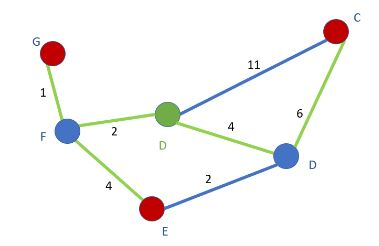

5. Dans l'arbre de poids couvrant minimal, on isole les sommets de degrés impairs et on les lie pair à pair

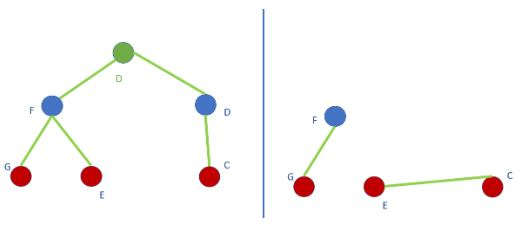

## Mise a jour des solutions
L'algorithme de christofides nous paraissait être un bon compromis, mais il y avait 2 problèmes:
-L'algorithme ne nous donne qu'un optimum local
-Il n'est pas adapté pour un graph avec des chemins tout tracés comme nous avons modélisé, il est plus adapté pour les graphs complets
Ainsi, nous nous sommes dirigés vers les méta-heuristiques.

## Choix de la méta-heuristique


Notre problème étant un problème du voyageur de commerce avec des contraintes différentes. Nous avons la possibilité de choisir entre plusieurs algorithmes afin de répondre à notre besoin. D'après une étude de 2013 nommée "Choice of best possible metaheuristic algorithm for the travelling salesman problem with limited computational time: quality, uncertainty and speed" trois méta-heuristiques ressortent du lot quand au problème du voyageur de commerce :


-	Le recuit simulé 
-   La liste tabou
-	L’algorithme génétique 

Nous avons alors décider de réaliser deux de ces algorithmes. Notre choix s'est donc porté sur le recuit simulé (annoncé comme étant l'algorithme le plus optimisé, ainsi que l'algorithme génétique, ayant de moins de moins bon résultats en solutions et en temps que la liste tabou mais ayant des résultats bien plus stables.


https://www.researchgate.net/profile/Bogumil-Kaminski-2/publication/312889331_Choice_of_best_possible_metaheuristic_algorithm_for_the_travelling_salesman_problem_with_limited_computational_time_Quality_uncertainty_and_speed/links/5fc22195a6fdcc6cc677a46a/Choice-of-best-possible-metaheuristic-algorithm-for-the-travelling-salesman-problem-with-limited-computational-time-Quality-uncertainty-and-speed.pdf


### L'algorithme recuit simulé 


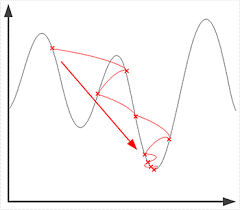


<div style="text-align: justify">Pour commencer nous allons donc parler de l’algorithme du recuit simulé. Le recuit simulé (Simulated Annealing) est une métaheuristique permettant de résoudre au mieux les problèmes que l’on appelle « optimisation difficile ». Elle permet d’éviter de se piéger dans les minima locaux de la fonction objective).
Cette méthode s’inspire de la technique du recuit dans le métallurgie.</div>
Nous pouvons prendre un exemple avec la métallurgie :

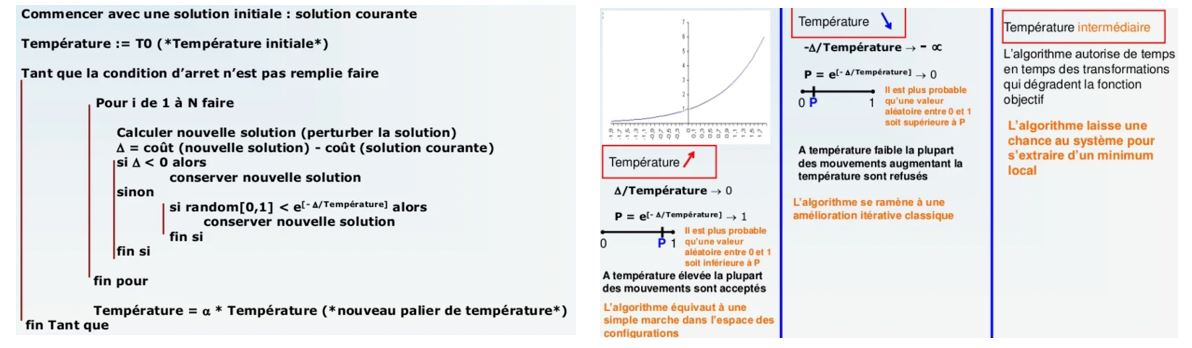

<div style="text-align: justify">Quand l’équilibre atteint une température donnée (c’est-à-dire l’optimum local), la température peut être à nouveau réduite légèrement pour effectuer une nouvelle série d’itérations.
Si la température atteint une valeur presque nulle ou si aucun mouvement pouvant améliorer la fonction objectif n’a été trouvée au cours du palier, l’algorithme prend fin.</div>


<div style="text-align: justify">A l’inverse d’un algorithme de recherche locale, l’algorithme de recuit simulé permet un abaissement de la fonction objectif avec une certaine probabilité. Suite à ce changement sur la fonction objectif, il est possible de la faire remonter pour ensuite trouver un point encore plus bas.</div>

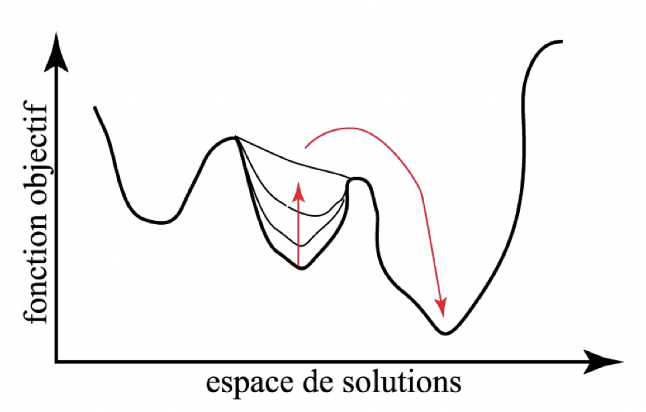

L'avantage de cet algorithme est qu'on peut très facilement l'adapter. Dans le cadre de notre contrainte.
Dans le Notebook Recuit_Simule.ipynb, Nous avons détaillé notre adaptation de l'algorithme ainsi que son fonctionnement mathématique.

### L'algorithme génétique

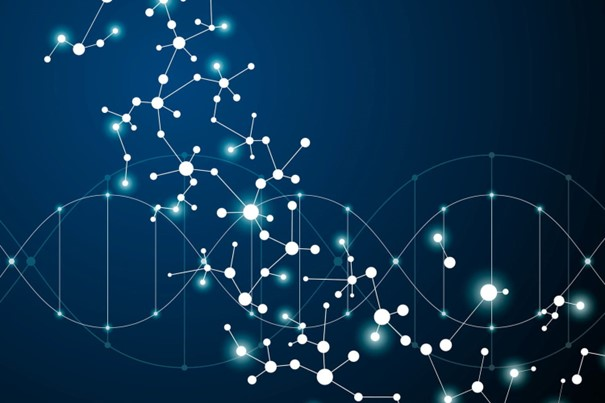

<div style="text-align: justify">L'algorithme génétique est un algorithme appartenant à la famille des algorithmes évolutionnistes. Le but est de trouver une solution optimum à un problème dans un temps raisonnable. 
L’énorme avantage est le fait qu’il ne faut que deux choses pour que l’algorithme fonctionne : une suite de tests permettant de déterminer la validité des résultats obtenus et une structure de données pour stocker les résultats.
Les algorithmes génétiques utilisent la notion de sélection naturelle, pour ne garder que les meilleurs résultats à chaque étapes de la recherche. 
Le domaine d’application des GA (Genetic Algorithm) est large. En effet, on peut le trouver dans une recherche simple d’une suite de nombre fournissant un résultat connu ou l’utiliser en duo avec un réseau de neurones artificiels pour créer des robots capables de reconnaître des images. </div>

Les différents termes liés aux algorithmes génétiques :
- Individu : un résultat, une instance de structure de données contenant un résultat qu’il soit optimum ou non. (chaine de caractère)
- Population : une collection, un regroupement d’individus 
- Génération : étape dans l’évolution d’une population
- Sélection : cette étape attribue un score à chaque individu en de son adaptation au problème donné. En fonction des scores obtenus par chaque individu de la population, certains seront conservés pour la génération suivante et d’autres seront supprimés. 
- Croisement : étape prenant 2 individus différents et de les faire se reproduire pour générer de nouveau individu. 
- Mutation : étape introduisant aléatoirement des modifications dans les constituants d’un individu 

L'algorithme du principe de l'algorithme génétique : 

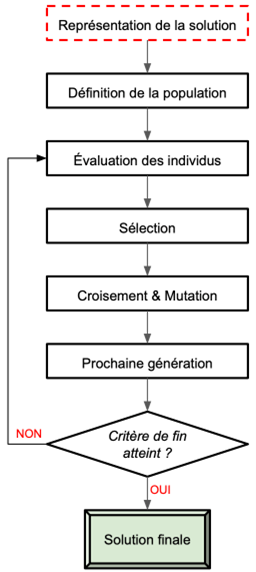

Dans une population P={x1,x2,...,xn} où la mesure d'adaptation d'un individu est évaluée par la fonction f, on peut calculer la probabilité d'être sélectionné : 

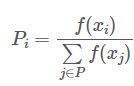

## Variation de l'algorithme selon nos besoins

Ayant décider de travailler sur un graphe non complet, le fonctionnement de l'algorithme génétique s'en voit fortement impacté. La phase de croisement qui permet la création d'un individu à partir des deux parents est ici impossible car cette contrainte ne nous permet pas de permuter nos point comme l'on voudrait dans le cas du croisement. Nos villes ont chacunes des voisins et notre solution est construite sur la chaine de voisins crées. Changer un point de la solution impliquerait que ce point ne soit pas forcément voisin avec son prédécesseur ni son successeur, rendant la solution impossible. Nous avons alors décidé de nous passer de la phase de croisement.

De la même manière la phase de mutation s'en retrouve impactée. Plutôt que de muter un unique point de la solution, nous devons alors muter toute la suite de point à partir de cette mutation. Nous choisissons donc un point aléatoire de la solution et à partir de celui-ci, nous reconstruisons à la suite une solution tout en vérifiant le passage par les points de livraisons ainsi que le retour à l'entrepot de la solution mutée.

## Comparaison des deux algorithmes

## Etude statistique


Sur la gauche, on peut voir l'algorithme génétique et sur la droite l'algorithme du recuit simulé. Le tableau compare le temps d'execution et la qualité des résultats fournis.

Nous avons ici comparé pour la qualité des résultats les distances parcourus, ainsi pour le meilleur des deux algorithmes, on a modélisé la contrainte de variation du trafic par la suite.
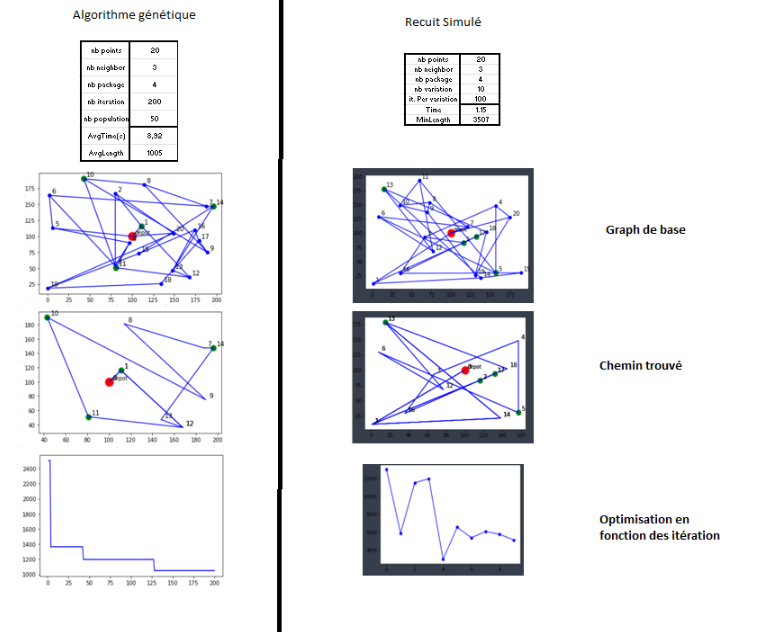
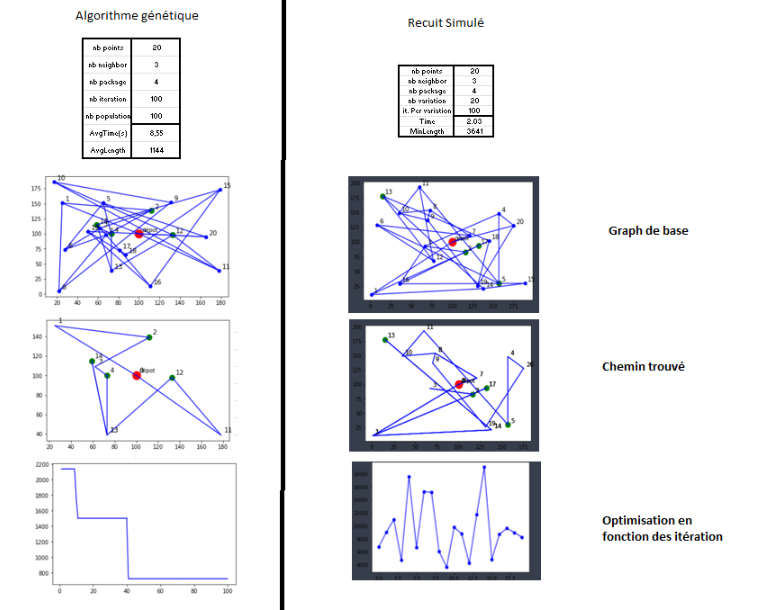
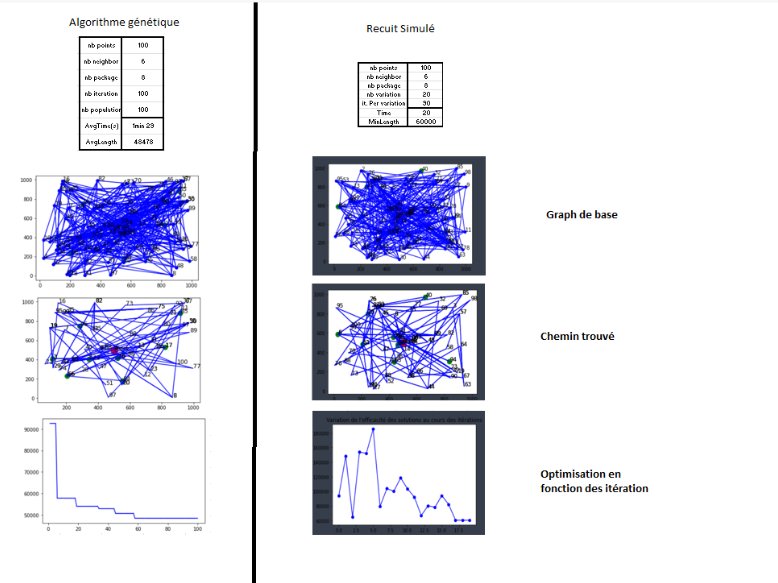


L'algorithme du recuit simulé donne un meilleur ratio qualité des résultats/ temps d'execution, ainsi, on l'a choisi pour modéliser notre seconde contrainte représentant la variation du trafic. Tout est expliqué en détail dans le notebook Recuit_Simule.ipynb.